# Boston Housing Price Prediction using Linear Regression

The objective is to predict the value of prices of the house using the given features.

2 types of Implementation
1) Simple Linear Regression with 2 variables

2) Multiple Linear Regression with many  variables

# 1- Simple Linear Regression

In [54]:
import pandas as pd 
data = pd.read_csv('Boston1.csv')
#data

Housing dataset which contains information about different houses in Boston

In [2]:
data.shape

(506, 14)

In [3]:
data.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population


MEDV: Median value of owner-occupied homes in $1000s


NOTE: MEDV is the value we want to Predict, the targetted value.
The prices of the house indicated by the variable MEDV is our 
target variable and the remaining are 
the feature variables based on which we will predict the value of a house.

In [4]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


1) Simple linear Regression:
In this first example we are going to use only 2 variables.
Let us take out the dependent and indpendent vaiables from the dataset

Independtent :lstat

Dependent:medv

In [55]:
data_ = data.loc[:,['rm','medv']]
data_.head(5)

,rm,medv
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


# Visualizing variables

In [46]:
import matplotlib.pyplot as plt

<Figure size 720x720 with 0 Axes>

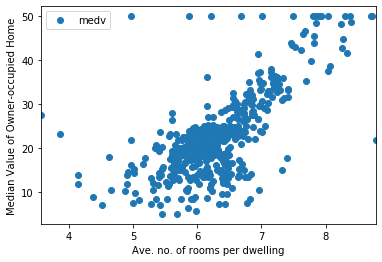

In [56]:
plt.figure(figsize=(10,10))
data.plot(x='rm',y='medv',style='o')
plt.xlabel('Ave. no. of rooms per dwelling')
plt.ylabel('Median Value of Owner-occupied Home')
plt.show()

# Preparing data

In [70]:
X = pd.DataFrame(data['rm'])
y = pd.DataFrame(data['medv'])

In [58]:
X.size, y.size

(506, 506)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [73]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

NOW we test our model if is giving correct predicitons?

Here below we are using X_test data = rm data as input (independent data) 
to predict the housing prices which is medv

In [74]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

Visualizing the fitted line to our dataset vs the the actual data.


In [75]:
import matplotlib.pyplot as plt

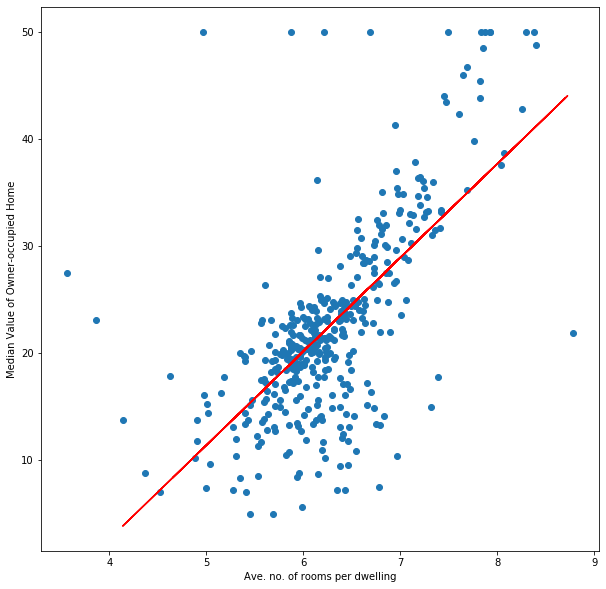

In [76]:
plt.figure(figsize=(10,10))
plt.scatter(X_train, y_train ,marker='o', label = 'Actual')
plt.plot(X_test, y_pred, color = 'r', label = 'Prediction')
plt.xlabel('Ave. no. of rooms per dwelling')
plt.ylabel('Median Value of Owner-occupied Home')
plt.show()

In [14]:
y_pred.head(5)

,Predicted
0,27.374117
1,27.697663
2,16.955936
3,26.847199
4,24.915168


the actual values of predictions are given below:medv

In [15]:
y_test.head(5)

,medv
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8


In [16]:
from sklearn import metrics  
from sklearn.metrics import r2_score
r2_score(y_test, y_pred, sample_weight=None)

0.5244757432765152

# 2-Mulit-Linear Regression

In [17]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('Boston1.csv')
#dataset


2) Multiple Linear Regression with many  variables

In [18]:
X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])

In [19]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [20]:
X.shape

(506, 13)

In [21]:
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


Dividing the dataset in training and testing sets.


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [24]:
X_test.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
463,5.82115,0.0,18.10,0,0.713,6.513,89.9,2.8016,24,666,20.2,393.82,10.29
152,1.12658,0.0,19.58,1,0.871,5.012,88.0,1.6102,5,403,14.7,343.28,12.12
291,0.07886,80.0,4.95,0,0.411,7.148,27.7,5.1167,4,245,19.2,396.90,3.56
183,0.10008,0.0,2.46,0,0.488,6.563,95.6,2.8470,3,193,17.8,396.90,5.68
384,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63


In [25]:
X.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


Fitting Linear Regression Model on the training dataset in oder to predict the Median Value of owner occupied Home.


In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
X_test.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
463,5.82115,0.0,18.10,0,0.713,6.513,89.9,2.8016,24,666,20.2,393.82,10.29
152,1.12658,0.0,19.58,1,0.871,5.012,88.0,1.6102,5,403,14.7,343.28,12.12
291,0.07886,80.0,4.95,0,0.411,7.148,27.7,5.1167,4,245,19.2,396.90,3.56
183,0.10008,0.0,2.46,0,0.488,6.563,95.6,2.8470,3,193,17.8,396.90,5.68
384,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63


In [28]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred.head(5)

,Predicted
0,23.015062
1,21.211587
2,33.715904
3,31.565424
4,3.182627


In [29]:
y_test.head(5)

,medv
463,20.2
152,15.3
291,37.3
183,32.5
384,8.8


Finding the accuracy score of the model.


In [30]:
from sklearn import metrics  
from sklearn.metrics import r2_score
r2_score(y_test, y_pred, sample_weight=None)


0.7789207451814408

In [31]:
print(X_test)

         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
463   5.82115   0.0  18.10     0  0.713  6.513  89.9  2.8016   24  666   
152   1.12658   0.0  19.58     1  0.871  5.012  88.0  1.6102    5  403   
291   0.07886  80.0   4.95     0  0.411  7.148  27.7  5.1167    4  245   
183   0.10008   0.0   2.46     0  0.488  6.563  95.6  2.8470    3  193   
384  20.08490   0.0  18.10     0  0.700  4.368  91.2  1.4395   24  666   
..        ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
200   0.01778  95.0   1.47     0  0.403  7.135  13.9  7.6534    3  402   
12    0.09378  12.5   7.87     0  0.524  5.889  39.0  5.4509    5  311   
129   0.88125   0.0  21.89     0  0.624  5.637  94.7  1.9799    4  437   
194   0.01439  60.0   2.93     0  0.401  6.604  18.8  6.2196    1  265   
320   0.16760   0.0   7.38     0  0.493  6.426  52.3  4.5404    5  287   

     ptratio   black  lstat  
463     20.2  393.82  10.29  
152     14.7  343.28  12.12  
291     19.2  396.90 

In [32]:
df1 = pd.DataFrame(y_test) 
df2 = pd.DataFrame(y_pred) 


Visualizing the difference between the Actual and Predicted values.


In [33]:
df1.merge(df2, left_on='medv', right_index=True,sort = False).reset_index()

C:\Users\SOUVIK\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1089: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,index,medv,Predicted
0,240,22.0,36.546110
1,67,22.0,36.546110
2,301,22.0,36.546110
3,285,22.0,36.546110
4,504,22.0,36.546110
5,410,15.0,25.381942
6,161,50.0,31.902886
7,480,23.0,20.596275
8,398,5.0,3.153820
9,258,36.0,13.707661


Using Seaborn to see the distribution of the actual and fitted values in Multi-Linear Regression


In [41]:
import seaborn as sns

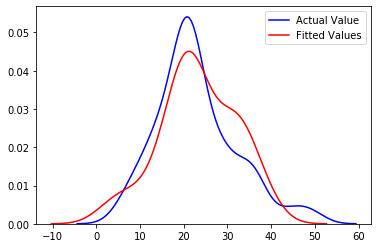

In [43]:
ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Value")
sns.distplot(y_pred, hist=False, color="r", label="Fitted Values" , ax=ax1)